### Radiation from AWAP for MDB

In [3]:
import numpy as np
import glob
import xarray as xr
import pandas as pd
rad_path = '/g/data/oe9/project/team-drip/AWAP/AWAP_month_radiation.nc'
radnc = xr.open_dataset(rad_path)
# radnc = radnc.rename({'e0_avg':'pet'})
radnc = radnc.where(radnc>=0, np.nan)
radnc = radnc.squeeze()
radnc

<xarray.Dataset>
Dimensions:     (latitude: 270, longitude: 280, nv: 2, time: 324)
Coordinates:
  * latitude    (latitude) float64 -24.55 -24.6 -24.65 -24.7 -24.75 -24.8 ...
  * longitude   (longitude) float64 138.5 138.6 138.6 138.7 138.7 138.8 ...
  * time        (time) datetime64[ns] 1991-01-01 1991-02-01 1991-03-01 ...
Dimensions without coordinates: nv
Data variables:
    crs         (time) float64 nan nan nan nan nan nan nan nan nan nan nan ...
    lat_bounds  (time, latitude, nv) float64 nan nan nan nan nan nan nan nan ...
    lon_bounds  (time, longitude, nv) float64 138.5 138.5 138.5 138.6 138.6 ...
    rad_month   (time, latitude, longitude) float64 25.6 25.22 25.38 25.69 ...

In [5]:
mask_path = '/g/data/oe9/project/team-drip/MDB_MASK/MASK_ARRAY_AWAP.nc'
radmask = xr.open_dataarray(mask_path)
radnc = radnc.where(radmask, drop=True)
radnc

<xarray.Dataset>
Dimensions:     (latitude: 263, longitude: 280, nv: 2, time: 324)
Coordinates:
  * latitude    (latitude) float64 -24.55 -24.6 -24.65 -24.7 -24.75 -24.8 ...
  * longitude   (longitude) float64 138.5 138.6 138.6 138.7 138.7 138.8 ...
  * time        (time) datetime64[ns] 1991-01-01 1991-02-01 1991-03-01 ...
Dimensions without coordinates: nv
Data variables:
    crs         (time, latitude, longitude) float64 nan nan nan nan nan nan ...
    lat_bounds  (time, latitude, nv, longitude) float64 nan nan nan nan nan ...
    lon_bounds  (time, longitude, nv, latitude) float64 nan nan nan nan nan ...
    rad_month   (time, latitude, longitude) float64 nan nan nan nan nan nan ...

### Plot sample of Radiation (monthly)

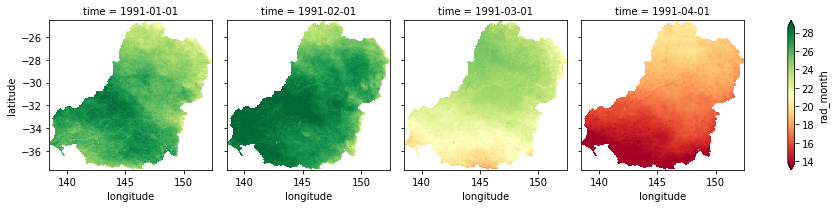

In [6]:
%matplotlib inline
radnc.rad_month.isel(time=range(0,4)).plot.imshow(col='time', robust = True, col_wrap=4, cmap = 'RdYlGn')
